## Imports

In [46]:
from neuralforecast.losses.pytorch import GMM, MQLoss, DistributionLoss, MAE, PMM
from neuralforecast.core import NeuralForecast
from utilsforecast.plotting import plot_series
from neuralforecast.models import DeepAR,TSMixerx, TiDE, MLP, TFT, RNN, TCN, MLPMultivariate, NBEATSx, DeepNPTS, NHITS, BiTCN,LSTM, DilatedRNN, KAN, GRU, PatchTST
from neuralforecast.tsdataset  import TimeSeriesDataset
import pandas as pd
import numpy as np
import logging

## Data Preparation

In [47]:
df = pd.read_csv('01_FEATURES_LIB.csv')
df['DT_FECHA'] = pd.to_datetime(df['DT_FECHA'])


df = df.rename(columns={
    'DT_FECHA': 'ds',
    'LABEL': 'unique_id',
    'QT_UNIDADES': 'y'
})

exogenous_vars = ['DT_WD_1',
 'DT_WD_2',
 'DT_WD_3',
 'DT_WD_4',
 'DT_WD_5',
 'DT_WD_6',
 'DT_WD_7',
 'DT_M_1',
 'DT_M_2',
 'DT_M_3',
 'DT_M_4',
 'DT_M_5',
 'DT_M_6',
 'DT_M_7',
 'DT_M_8',
 'DT_M_9',
 'DT_M_10',
 'DT_M_11',
 'DT_M_12',
 'IN_CIERRE_90_M1',
 'IN_CIERRE_90_M2',
 'IN_CIERRE_90_M3',
 'IN_CIERRE_90_M4',
 'IN_CIERRE_90_M5',
 'IN_CIERRE_90_M6',
 'IN_CIERRE_90_M7',
 'IN_CIERRE_90_M8',
 'IN_CIERRE_90_M9',
 'IN_CIERRE_90_M10',
 'IN_CIERRE_90_M11',
 'IN_CIERRE_90_M12',
 'IN_CIERRE_50_M1',
 'IN_CIERRE_50_M2',
 'IN_CIERRE_50_M3',
 'IN_CIERRE_50_M4',
 'IN_CIERRE_50_M5',
 'IN_CIERRE_50_M6',
 'IN_CIERRE_50_M7',
 'IN_CIERRE_50_M8',
 'IN_CIERRE_50_M9',
 'IN_CIERRE_50_M10',
 'IN_CIERRE_50_M11',
 'IN_CIERRE_50_M12',
 'IN_FESTIVO',
 'DIC_17',
 'DIC_18',
 'DIC_19',
 'DIC_20',
 'DIC_21',
 'DIC_22',
 'DIC_23',
 'DIC_24',
 'DIC_26',
 'DIC_27',
 'DIC_28',
 'DIC_29',
 'DIC_30',
 'ENE_1',
 'ENE_2',
 'ENE_3',
 'ENE_4',
 'ENE_5',
 'ENE_6',
 'OI_8_DIAS_DE_ORO_CTE',
 'OI_8_DIAS_DE_ORO_IX',
 'OI_8_DIAS_DE_ORO_IX2',
 'OI_8_DIAS_DE_ORO_INI',
 'OI_8_DIAS_DE_ORO_FIN',
 'OI_BLACK_FRIDAY_FASE_1_CTE',
 'OI_BLACK_FRIDAY_FASE_1_IX',
 'OI_BLACK_FRIDAY_FASE_1_IX2',
 'OI_BLACK_FRIDAY_FASE_1_INI',
 'OI_BLACK_FRIDAY_FASE_1_FIN',
 'OI_BLACK_FRIDAY_FASE_2_CTE',
 'OI_BLACK_FRIDAY_FASE_2_IX',
 'OI_BLACK_FRIDAY_FASE_2_IX2',
 'OI_BLACK_FRIDAY_FASE_2_INI',
 'OI_BLACK_FRIDAY_FASE_2_FIN',
 'OI_CYBER_MONDAY_CTE',
 'OI_CYBER_MONDAY_IX',
 'OI_CYBER_MONDAY_IX2',
 'OI_CYBER_MONDAY_INI',
 'OI_CYBER_MONDAY_FIN',
 'OI_DIA_SIN_IVA_CTE',
 'OI_DIA_SIN_IVA_IX',
 'OI_DIA_SIN_IVA_IX2',
 'OI_DIA_SIN_IVA_INI',
 'OI_DIA_SIN_IVA_FIN',
 'OI_INICIO_BLANCOLOR_CTE',
 'OI_INICIO_BLANCOLOR_IX',
 'OI_INICIO_BLANCOLOR_IX2',
 'OI_INICIO_BLANCOLOR_INI',
 'OI_INICIO_BLANCOLOR_FIN',
 'OI_LIMITE_48_HORAS_FASE_1_CTE',
 'OI_LIMITE_48_HORAS_FASE_1_IX',
 'OI_LIMITE_48_HORAS_FASE_1_IX2',
 'OI_LIMITE_48_HORAS_FASE_1_INI',
 'OI_LIMITE_48_HORAS_FASE_1_FIN',
 'OI_LIMITE_48_HORAS_FASE_2_CTE',
 'OI_LIMITE_48_HORAS_FASE_2_IX',
 'OI_LIMITE_48_HORAS_FASE_2_IX2',
 'OI_LIMITE_48_HORAS_FASE_2_INI',
 'OI_LIMITE_48_HORAS_FASE_2_FIN',
 'OI_LIMITE_48_HORAS_FASE_3_CTE',
 'OI_LIMITE_48_HORAS_FASE_3_IX',
 'OI_LIMITE_48_HORAS_FASE_3_IX2',
 'OI_LIMITE_48_HORAS_FASE_3_INI',
 'OI_LIMITE_48_HORAS_FASE_3_FIN',
 'OI_LIMITE_48_HORAS_FASE_4_CTE',
 'OI_LIMITE_48_HORAS_FASE_4_IX',
 'OI_LIMITE_48_HORAS_FASE_4_IX2',
 'OI_LIMITE_48_HORAS_FASE_4_INI',
 'OI_LIMITE_48_HORAS_FASE_4_FIN',
 'OI_SEMANA_DEL_DEPORTE_CTE',
 'OI_SEMANA_DEL_DEPORTE_IX',
 'OI_SEMANA_DEL_DEPORTE_IX2',
 'OI_SEMANA_DEL_DEPORTE_INI',
 'OI_SEMANA_DEL_DEPORTE_FIN',
 'OI_SEMANA_LENCERIA_CTE',
 'OI_SEMANA_LENCERIA_IX',
 'OI_SEMANA_LENCERIA_IX2',
 'OI_SEMANA_LENCERIA_INI',
 'OI_SEMANA_LENCERIA_FIN',
 'OI_SUPERTECNOPRECIOS_CTE',
 'OI_SUPERTECNOPRECIOS_IX',
 'OI_SUPERTECNOPRECIOS_IX2',
 'OI_SUPERTECNOPRECIOS_INI',
 'OI_SUPERTECNOPRECIOS_FIN',
 'OI_VENTAS_PRIVADAS_CTE',
 'OI_VENTAS_PRIVADAS_IX',
 'OI_VENTAS_PRIVADAS_IX2',
 'OI_VENTAS_PRIVADAS_INI',
 'OI_VENTAS_PRIVADAS_FIN',
 'PV_8_DIAS_DE_ORO_CTE',
 'PV_8_DIAS_DE_ORO_IX',
 'PV_8_DIAS_DE_ORO_IX2',
 'PV_8_DIAS_DE_ORO_INI',
 'PV_8_DIAS_DE_ORO_FIN',
 'PV_LIMITE_48_HORAS_FASE_1_CTE',
 'PV_LIMITE_48_HORAS_FASE_1_IX',
 'PV_LIMITE_48_HORAS_FASE_1_IX2',
 'PV_LIMITE_48_HORAS_FASE_1_INI',
 'PV_LIMITE_48_HORAS_FASE_1_FIN',
 'PV_LIMITE_48_HORAS_FASE_2_CTE',
 'PV_LIMITE_48_HORAS_FASE_2_IX',
 'PV_LIMITE_48_HORAS_FASE_2_IX2',
 'PV_LIMITE_48_HORAS_FASE_2_INI',
 'PV_LIMITE_48_HORAS_FASE_2_FIN',
 'PV_LIMITE_48_HORAS_FASE_3_CTE',
 'PV_LIMITE_48_HORAS_FASE_3_IX',
 'PV_LIMITE_48_HORAS_FASE_3_IX2',
 'PV_LIMITE_48_HORAS_FASE_3_INI',
 'PV_LIMITE_48_HORAS_FASE_3_FIN',
 'PV_LIMITE_48_HORAS_FASE_4_CTE',
 'PV_LIMITE_48_HORAS_FASE_4_IX',
 'PV_LIMITE_48_HORAS_FASE_4_IX2',
 'PV_LIMITE_48_HORAS_FASE_4_INI',
 'PV_LIMITE_48_HORAS_FASE_4_FIN',
 'PV_SEMANA_DE_INTERNET_CTE',
 'PV_SEMANA_DE_INTERNET_IX',
 'PV_SEMANA_DE_INTERNET_IX2',
 'PV_SEMANA_DE_INTERNET_INI',
 'PV_SEMANA_DE_INTERNET_FIN',
 'PV_VENTAS_PRIVADAS_CTE',
 'PV_VENTAS_PRIVADAS_IX',
 'PV_VENTAS_PRIVADAS_IX2',
 'PV_VENTAS_PRIVADAS_INI',
 'PV_VENTAS_PRIVADAS_FIN',
 'OI_BLACK_FRIDAY_PRE',
 'OI_BLACK_FRIDAY_POST',
 'VERANO_PERIODO_FINAL_CTE',
 'VERANO_PERIODO_FINAL_IX',
 'VERANO_PERIODO_FINAL_IX2',
 'VERANO_PERIODO_FINAL_INI',
 'VERANO_PERIODO_FINAL_FIN',
 'VERANO_PRIMER_PERIODO_CTE',
 'VERANO_PRIMER_PERIODO_IX',
 'VERANO_PRIMER_PERIODO_IX2',
 'VERANO_PRIMER_PERIODO_INI',
 'VERANO_PRIMER_PERIODO_FIN',
 'VERANO_SEGUNDO_PERIODO_CTE',
 'VERANO_SEGUNDO_PERIODO_IX',
 'VERANO_SEGUNDO_PERIODO_IX2',
 'VERANO_SEGUNDO_PERIODO_INI',
 'VERANO_SEGUNDO_PERIODO_FIN',
 'INVIERNO_PERIODO_FINAL_CTE',
 'INVIERNO_PERIODO_FINAL_IX',
 'INVIERNO_PERIODO_FINAL_IX2',
 'INVIERNO_PERIODO_FINAL_INI',
 'INVIERNO_PERIODO_FINAL_FIN',
 'INVIERNO_PRIMER_PERIODO_CTE',
 'INVIERNO_PRIMER_PERIODO_IX',
 'INVIERNO_PRIMER_PERIODO_IX2',
 'INVIERNO_PRIMER_PERIODO_INI',
 'INVIERNO_PRIMER_PERIODO_FIN',
 'INVIERNO_SEGUNDO_PERIODO_CTE',
 'INVIERNO_SEGUNDO_PERIODO_IX',
 'INVIERNO_SEGUNDO_PERIODO_IX2',
 'INVIERNO_SEGUNDO_PERIODO_INI',
 'INVIERNO_SEGUNDO_PERIODO_FIN',
 'LIBROS_TEXTO_LIB']

# df['month'] = df['ds'].dt.month
# df['year'] = df['ds'].dt.year
# df['day'] = df['ds'].dt.day
# df['day_of_week'] = df['ds'].dt.day_of_week
# df['day_of_year'] = df['ds'].dt.day_of_year

# exogenous_vars += ['month', 'year','day', 'day_of_week' , 'day_of_year']
# exogenous_vars += ['month','day_of_week']

df = df[['unique_id', 'ds', 'y'] + exogenous_vars]
df = df.sort_values(by=['unique_id','ds'])


dummies = pd.get_dummies(df['unique_id'], prefix='CAT')
df_with_dummies = pd.concat([df[['unique_id']], dummies], axis=1)
static_df  = df_with_dummies.groupby('unique_id').max().reset_index()
stat_exog_list = static_df.columns[1:].to_list()

In [48]:
print(df[(df['ds'] >= '2024-11-25') & (df['ds'] <= '2024-12-02') & (df['unique_id'] == 'ENVIOS')][['ds', 'unique_id', 'OI_BLACK_FRIDAY_FASE_1_CTE',
 'OI_BLACK_FRIDAY_FASE_1_IX',
 'OI_BLACK_FRIDAY_FASE_1_IX2',
 'OI_BLACK_FRIDAY_FASE_1_INI',
 'OI_BLACK_FRIDAY_FASE_1_FIN',
 'OI_BLACK_FRIDAY_FASE_2_CTE',
 'OI_BLACK_FRIDAY_FASE_2_IX',
 'OI_BLACK_FRIDAY_FASE_2_IX2',
 'OI_BLACK_FRIDAY_FASE_2_INI',
 'OI_BLACK_FRIDAY_FASE_2_FIN']].sort_values(by='ds').to_string())

             ds unique_id  OI_BLACK_FRIDAY_FASE_1_CTE  OI_BLACK_FRIDAY_FASE_1_IX  OI_BLACK_FRIDAY_FASE_1_IX2  OI_BLACK_FRIDAY_FASE_1_INI  OI_BLACK_FRIDAY_FASE_1_FIN  OI_BLACK_FRIDAY_FASE_2_CTE  OI_BLACK_FRIDAY_FASE_2_IX  OI_BLACK_FRIDAY_FASE_2_IX2  OI_BLACK_FRIDAY_FASE_2_INI  OI_BLACK_FRIDAY_FASE_2_FIN
84   2024-11-25    ENVIOS                           1                   0.333333                    0.111111                           1                           0                           0                        0.0                        0.00                           0                           0
1772 2024-11-26    ENVIOS                           1                   0.666667                    0.444444                           0                           0                           0                        0.0                        0.00                           0                           0
400  2024-11-27    ENVIOS                           1                   1.000000        

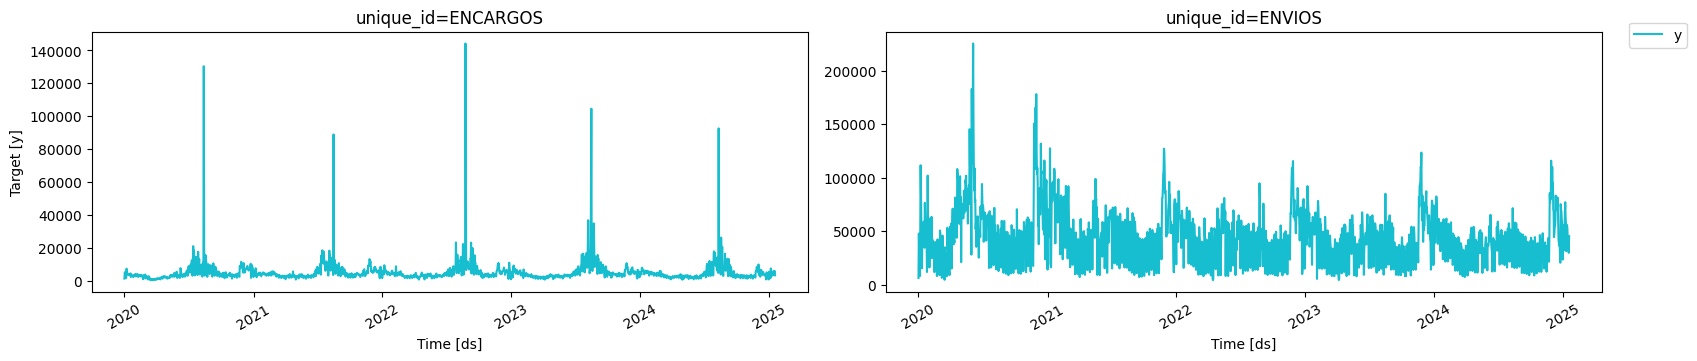

In [49]:
plot_series(df)

## Models

In [64]:
horizon = 90
max_steps = 100
input_size = 5*horizon
dropout=0.1
learning_rate = 1e-2

train_cutoff = pd.Timestamp('2024-09-30')
# train_cutoff = df['ds'].max() - pd.Timedelta(days=horizon) 
train_data = df[df['ds'] <= train_cutoff]
test_data = df[(df['ds'] > train_cutoff) & (df['ds'] <= train_cutoff + pd.Timedelta(days=horizon+2))]


In [65]:
logging.getLogger("pytorch_lightning").setLevel(logging.WARNING)


In [66]:
# from nbdev.showdoc import show_doc
# show_doc(TiDE)
# show_doc(RNN.fit, name='RNN.fit')

In [67]:
models = [  BiTCN(h = horizon,
                input_size = input_size,
                max_steps=max_steps,
                futr_exog_list = exogenous_vars, 
                stat_exog_list = stat_exog_list,
                hist_exog_list=exogenous_vars, 
                scaler_type = 'robust',
                loss=PMM(n_components=5, return_params=True, level=[80,90]),
                learning_rate = learning_rate,

                hidden_size=8,  # Más unidades en las capas ocultas 16 - 128
                dropout=dropout,  # Regularización
                ),
    
            #TiDE(h=horizon,
            #    input_size=input_size,

            #    hidden_size=1024, # Más unidades en las capas ocultas 1024
            #    num_encoder_layers=2, # Más capas en el encoder 1
            #    num_decoder_layers=2, # Más capas en el encoder 1
            #    decoder_output_dim=32, # Más unidades en la capa de salida 32
            #    temporal_decoder_dim=128, # Más unidades en la capa de salida 128
            #    #dropout=dropout, # Regularización
            #    layernorm=True,

            #    loss=PMM(n_components=7, return_params=True, level=[80,90]),
            #    max_steps=max_steps,
            #    learning_rate = learning_rate,
            #    scaler_type='robust',
            #    futr_exog_list=exogenous_vars,
                #hist_exog_list=exogenous_vars,
            #    stat_exog_list=stat_exog_list,
            #    ),

]

Seed set to 1


## Train

In [68]:
nf = NeuralForecast(models=models, freq='D')
nf.fit(df=train_data, static_df=static_df)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

## Forecast

In [69]:
Y_hat_df = nf.predict(futr_df=test_data)
Y_hat_df = pd.merge(Y_hat_df, test_data[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='left')
Y_hat_df


c:\Users\julian.quintero\WORKSPACE\NEURAL_FORECAST\neuralforecast\neuralforecast\core.py:904: UserWarning:

Dropped 4 unused rows from `futr_df`.



Predicting: |          | 0/? [00:00<?, ?it/s]

,unique_id,ds,BiTCN,BiTCN-median,BiTCN-lo-90,BiTCN-lo-80,BiTCN-hi-80,BiTCN-hi-90,BiTCN-lambda-1,BiTCN-lambda-2,BiTCN-lambda-3,BiTCN-lambda-4,BiTCN-lambda-5,y
0,ENCARGOS,2024-10-01,5023.596191,4032.0,1525.000000,1555.000000,12231.099609,12297.150391,12228.265625,4056.879395,4103.662598,1553.808838,3223.247070,3739
1,ENCARGOS,2024-10-02,4629.597168,3096.0,1262.949951,1284.000000,13038.200195,13108.000000,13037.162109,3098.169434,2325.324707,1286.721680,3474.893799,3393
2,ENCARGOS,2024-10-03,3500.725098,3763.0,113.000000,123.000000,6328.299805,6387.049805,6330.951172,4846.519043,3733.083008,121.559082,2037.143799,2737
3,ENCARGOS,2024-10-04,2727.096924,2577.0,561.000000,579.000000,5930.100098,5983.000000,2190.033203,5931.228516,2637.192871,581.865234,2618.674805,3836
4,ENCARGOS,2024-10-05,779.124023,0.0,0.000000,0.000000,3719.000000,3753.000000,0.000000,3704.976318,0.000000,0.000000,0.000000,3044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,ENVIOS,2024-12-25,15631.293945,10152.5,0.000000,0.000000,49462.500000,49627.351562,0.000000,49483.046875,0.000000,10166.501953,19119.750000,20553
176,ENVIOS,2024-12-26,64925.312500,65065.0,48763.949219,48906.898438,75821.203125,75976.101562,65006.847656,64727.296875,75814.414062,69632.023438,48927.871094,75225
177,ENVIOS,2024-12-27,63196.042969,68729.0,41279.851562,41406.898438,79169.703125,79343.148438,69591.859375,68693.000000,79165.523438,56155.515625,41399.921875,68908
178,ENVIOS,2024-12-28,62727.097656,64923.5,43634.449219,43795.898438,78558.601562,78735.046875,64839.382812,68314.101562,78520.812500,56373.910156,43794.324219,68922


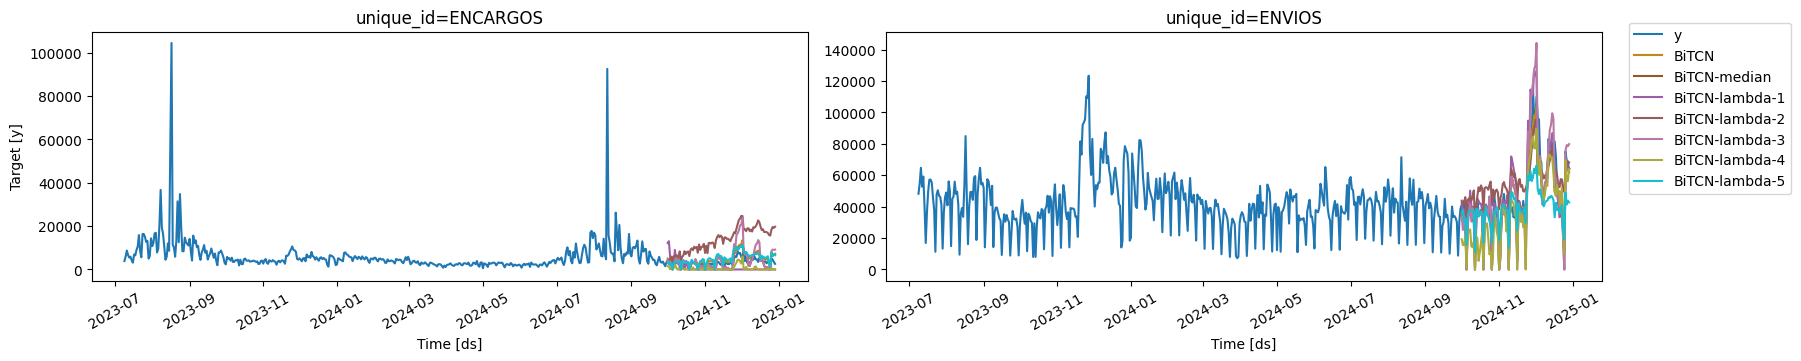

In [70]:
plot_series(train_data, Y_hat_df, max_insample_length=horizon*5)


In [71]:
import pandas as pd

# Supongamos que df es tu DataFrame
def calculate_metrics(df):
    # Identificar columnas de predicción
    prediction_cols = [col for col in df.columns if col not in ['unique_id', 'ds', 'y']]
    
    results = []

    # Agrupar por unique_id
    for unique_id, group in df.groupby('unique_id'):
        y_real = group['y'].values
        y_sum = abs(y_real).sum()

        # Calcular métricas para cada columna de predicción
        for col in prediction_cols:
            y_pred = group[col].values
            abs_error = abs(y_real - y_pred)
            
            wape = abs_error.sum() / y_sum if y_sum != 0 else None
            std_dev = abs_error.std()

            results.append({
                'unique_id': unique_id,
                'model': col,
                'WAPE': wape,
                'StdDev_Error': std_dev
            })
    
    # Convertir resultados a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Aplicar la función al DataFrame
metrics_df = calculate_metrics(Y_hat_df)


print(metrics_df.to_string())

   unique_id           model      WAPE  StdDev_Error
0   ENCARGOS           BiTCN  0.478737   1400.543513
1   ENCARGOS    BiTCN-median  0.493628   1222.450213
2   ENCARGOS     BiTCN-lo-90  0.973942   1653.177016
3   ENCARGOS     BiTCN-lo-80  0.973376   1654.828799
4   ENCARGOS     BiTCN-hi-80  2.998652   4437.581480
5   ENCARGOS     BiTCN-hi-90  3.021091   4454.573556
6   ENCARGOS  BiTCN-lambda-1  1.005338   1938.070910
7   ENCARGOS  BiTCN-lambda-2  2.918543   4798.434871
8   ENCARGOS  BiTCN-lambda-3  0.786876   3294.297417
9   ENCARGOS  BiTCN-lambda-4  0.864343   1279.657436
10  ENCARGOS  BiTCN-lambda-5  0.571394   1365.012562
11    ENVIOS           BiTCN  0.129045   7043.060315
12    ENVIOS    BiTCN-median  0.157019   7259.529310
13    ENVIOS     BiTCN-lo-90  0.356892  11821.990847
14    ENVIOS     BiTCN-lo-80  0.354938  11792.605957
15    ENVIOS     BiTCN-hi-80  0.348835   8988.130954
16    ENVIOS     BiTCN-hi-90  0.351732   9007.635038
17    ENVIOS  BiTCN-lambda-1  0.200660   8834.

In [72]:
# Ordenar por unique_id y WAPE
metrics_df_sorted = metrics_df.sort_values(by=['unique_id', 'WAPE'])

# Obtener el modelo con menor WAPE para cada unique_id
best_models_df = metrics_df_sorted.groupby('unique_id').first().reset_index()

best_models_df

,unique_id,model,WAPE,StdDev_Error
0,ENCARGOS,BiTCN,0.478737,1400.543513
1,ENVIOS,BiTCN,0.129045,7043.060315


In [73]:
import plotly.express as px
import plotly.io as pio
import os  # Para manejar rutas y nombres de archivo

pio.renderers.default = "browser"

def plot_predictions(df, unique_id, save_path=None, file_name=None):
    """
    Genera un gráfico interactivo para un único unique_id mostrando y y las predicciones, 
    y opcionalmente guarda la gráfica como archivo HTML.
    
    Args:
        df (pd.DataFrame): DataFrame con las columnas 'unique_id', 'ds', 'y' y las predicciones.
        unique_id (str): Identificador único para filtrar los datos.
        save_path (str, optional): Ruta donde guardar la gráfica. Default: None.
        file_name (str, optional): Nombre del archivo HTML. Default: None.
    """
    # Filtrar el DataFrame por unique_id
    df_filtered = df[df['unique_id'] == unique_id]

    # Transformar a formato largo para graficar fácilmente
    prediction_cols = [col for col in df.columns if col not in ['unique_id', 'ds', 'y']]
    df_long = df_filtered.melt(id_vars=['ds', 'y'], 
                               value_vars=prediction_cols, 
                               var_name='Model', 
                               value_name='Prediction')

    # Crear gráfico interactivo
    fig = px.line(df_long, 
                  x='ds', 
                  y='Prediction', 
                  color='Model',
                  title=f'Predicciones para unique_id: {unique_id}',
                  labels={'ds': 'Fecha', 'Prediction': 'Valor'},
                  template='plotly_white')
    
    # Agregar la serie real (y)
    fig.add_scatter(x=df_filtered['ds'], 
                    y=df_filtered['y'], 
                    mode='lines', 
                    name='Real', 
                    line=dict(color='black', dash='dash'))
    
    # Mostrar la gráfica
    fig.show()

    # Guardar la gráfica como HTML si se especifica una ruta
    if save_path and file_name:
        # Crear la carpeta si no existe
        os.makedirs(save_path, exist_ok=True)
        
        # Ruta completa del archivo
        file_path = os.path.join(save_path, file_name)
        
        # Guardar gráfica como HTML
        try:
            fig.write_html(file_path)
            print(f"Gráfica interactiva guardada en: {file_path}")
        except Exception as e:
            print(f"Error al guardar la gráfica como HTML: {e}")







## Plot Fore

In [81]:
idx = 'ENVIOS'
modelo = 'BiTCN_BEST'
plot_predictions(Y_hat_df, unique_id=idx) # save_path='./graficas', file_name=f'{idx}_{modelo}.html'

## Forecast whitout BF

In [75]:
test_data_sbf = test_data.copy()
mask = (test_data_sbf['ds'] >= '2024-11-25') & (test_data_sbf['ds'] <= '2024-12-02')

# Lista de columnas a poner en cero
columns_to_zero = [
    'OI_BLACK_FRIDAY_FASE_1_CTE',
    'OI_BLACK_FRIDAY_FASE_1_IX',
    'OI_BLACK_FRIDAY_FASE_1_IX2',
    'OI_BLACK_FRIDAY_FASE_1_INI',
    'OI_BLACK_FRIDAY_FASE_1_FIN',
    'OI_BLACK_FRIDAY_FASE_2_CTE',
    'OI_BLACK_FRIDAY_FASE_2_IX',
    'OI_BLACK_FRIDAY_FASE_2_IX2',
    'OI_BLACK_FRIDAY_FASE_2_INI',
    'OI_BLACK_FRIDAY_FASE_2_FIN'
]

# Poner en cero las columnas especificadas en el rango de fechas
test_data_sbf.loc[mask, columns_to_zero] = 0

In [76]:
Y_hat_df = nf.predict(futr_df=test_data_sbf)
Y_hat_df = pd.merge(Y_hat_df, test_data_sbf[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='left')
Y_hat_df

c:\Users\julian.quintero\WORKSPACE\NEURAL_FORECAST\neuralforecast\neuralforecast\core.py:904: UserWarning:

Dropped 4 unused rows from `futr_df`.



Predicting: |          | 0/? [00:00<?, ?it/s]

,unique_id,ds,BiTCN,BiTCN-median,BiTCN-lo-90,BiTCN-lo-80,BiTCN-hi-80,BiTCN-hi-90,BiTCN-lambda-1,BiTCN-lambda-2,BiTCN-lambda-3,BiTCN-lambda-4,BiTCN-lambda-5,y
0,ENCARGOS,2024-10-01,5024.692871,4033.0,1531.000000,1554.000000,12220.099609,12287.000000,12224.410156,4062.793457,4110.392578,1554.196533,3221.739014,3739
1,ENCARGOS,2024-10-02,4627.783203,3078.0,1280.949951,1304.000000,13009.299805,13084.099609,13021.860352,3089.535645,2334.937988,1302.398193,3469.361816,3393
2,ENCARGOS,2024-10-03,3499.238037,3765.5,106.949997,114.000000,6326.000000,6379.049805,6330.488281,4859.381836,3748.072998,112.897461,2021.739746,2737
3,ENCARGOS,2024-10-04,2726.627930,2595.0,576.000000,594.900024,5918.100098,5959.049805,2173.384521,5919.076660,2646.429932,597.023193,2623.945801,3836
4,ENCARGOS,2024-10-05,778.025024,0.0,0.000000,0.000000,3714.000000,3748.149902,0.000000,3699.851562,0.000000,0.000000,0.000000,3044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,ENVIOS,2024-12-25,15645.056641,10121.0,0.000000,0.000000,49493.101562,49653.101562,0.000000,49476.578125,0.000000,10139.625000,19196.175781,20553
176,ENVIOS,2024-12-26,64927.535156,65061.0,48846.851562,48976.601562,75812.000000,75986.250000,64975.296875,64652.773438,75774.875000,69664.171875,48976.882812,75225
177,ENVIOS,2024-12-27,63180.335938,68607.0,41315.500000,41433.601562,79142.601562,79326.046875,69569.523438,68628.453125,79112.335938,56183.886719,41423.167969,68908
178,ENVIOS,2024-12-28,62712.410156,64895.0,43711.851562,43855.699219,78484.101562,78647.046875,64840.476562,68235.453125,78464.375000,56391.328125,43838.398438,68922


In [77]:
Y_hat_df['unique_id'].unique()

array(['ENCARGOS', 'ENVIOS'], dtype=object)

In [78]:
idx = 'ENVIOS'
modelo = 'BiTCN_BEST'
plot_predictions(Y_hat_df, unique_id=idx) # save_path='./graficas', file_name=f'{idx}_{modelo}_NOBF.html'


In [79]:
# Y_hat_df.to_csv(f'RESULTADOS_{modelo}.csv', index=False)

## Plot Fore without BF

In [82]:
Y_hat_df_3 = nf.predict(futr_df=df)
Y_hat_df_3 = pd.merge(Y_hat_df_3, df[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='left')
Y_hat_df_3

idx = 'ENVIOS'
modelo = 'TiDE_BiTCN_BIG'
plot_predictions(Y_hat_df_3, unique_id=idx)

c:\Users\julian.quintero\WORKSPACE\NEURAL_FORECAST\neuralforecast\neuralforecast\core.py:904: UserWarning:

Dropped 3,512 unused rows from `futr_df`.



Predicting: |          | 0/? [00:00<?, ?it/s]